# **MAMBA-TKAN-LSTM**
**Wajdi Zarai , Zhaojing Huang (2024)**



## **1. INTRODUCTION**

The development of machine learning, particularly deep learning, has significantly advanced time series
analysis in finance (Filipovi ́c and Khalilzadeh), such as predicting future stock prices using Long and
Short Term Memory (LSTM) networks (Selvin et al.). Building on this, the performance of two
state-of-the-art models for stock price prediction will be examined:
- Kolmogorov-Arnold Networks (KANs) (Liu et al.), especially the Temporal Kolmogorov-Arnold Transformer Networks (TKANs) (Genet and Inzirillo), which utilize an attention mechanism to efficiently capture temporal patterns in multivariate data streams.
- Structured State Space Sequence model (S4) (Gu et al.), with its variant MAMBA (Guand Dao), known for excelling in long-range sequence modeling across domains like vision, language, and audio.

The study will implement these models to predict future stock prices and evaluate their performance within an asset allocation problem.

In [ ]:
# Import Librairies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
files.upload()

Saving BAJAJ-AUTO.csv to BAJAJ-AUTO.csv
Saving BAJAJFINSV.csv to BAJAJFINSV.csv
Saving BAJFINANCE.csv to BAJFINANCE.csv
Saving BRITANNIA.csv to BRITANNIA.csv
Saving CIPLA.csv to CIPLA.csv
Saving HEROMOTOCO.csv to HEROMOTOCO.csv
Saving HINDALCO.csv to HINDALCO.csv
Saving INDUSINDBK.csv to INDUSINDBK.csv
Saving ITC.csv to ITC.csv
Saving KOTAKBANK.csv to KOTAKBANK.csv
Saving MARUTI.csv to MARUTI.csv
Saving NIFTY.csv to NIFTY.csv
Saving NTPC.csv to NTPC.csv
Saving ONGC.csv to ONGC.csv
Saving RELIANCE.csv to RELIANCE.csv
Saving SHRIRAMFIN.csv to SHRIRAMFIN.csv
Saving TATACONSUM.csv to TATACONSUM.csv
Saving TATASTEEL.csv to TATASTEEL.csv
Saving TCS.csv to TCS.csv
Saving TITAN.csv to TITAN.csv
Saving WIPRO.csv to WIPRO.csv


{'BAJAJ-AUTO.csv': b'symbol,date,open,high,low,close,volume\r\nBAJAJ-AUTO,2008-06-09,287.5,287.5,262.0,274.4,642398\r\nBAJAJ-AUTO,2008-06-10,287.75,287.75,273.5,275.2,116236\r\nBAJAJ-AUTO,2008-06-11,280.0,280.0,264.0,265.25,175586\r\nBAJAJ-AUTO,2008-06-12,255.5,263.5,255.35,259.73,101458\r\nBAJAJ-AUTO,2008-06-13,257.13,262.5,250.6,252.95,247868\r\nBAJAJ-AUTO,2008-06-16,255.0,259.0,244.73,247.32,123184\r\nBAJAJ-AUTO,2008-06-17,245.23,255.0,241.3,253.35,142952\r\nBAJAJ-AUTO,2008-06-18,255.05,265.5,250.0,258.23,211010\r\nBAJAJ-AUTO,2008-06-19,250.1,263.5,250.1,256.27,280966\r\nBAJAJ-AUTO,2008-06-20,253.5,259.5,246.8,256.05,153312\r\nBAJAJ-AUTO,2008-06-23,250.0,257.45,249.5,251.15,179776\r\nBAJAJ-AUTO,2008-06-24,247.5,253.0,235.57,239.5,348262\r\nBAJAJ-AUTO,2008-06-25,225.0,251.0,225.0,248.65,145066\r\nBAJAJ-AUTO,2008-06-26,259.95,259.95,234.52,244.48,370468\r\nBAJAJ-AUTO,2008-06-27,232.95,238.43,217.5,226.98,521218\r\nBAJAJ-AUTO,2008-06-30,227.0,229.98,222.68,225.18,230012\r\nBAJAJ-AUTO,2

In [ ]:
# Improt the stocks data we are working with the indian stock market daily data

import pandas as pd
df = pd.read_csv('BAJAJ-AUTO.csv')[['date', 'close']]
Stocks = ['BAJAJ-AUTO','BAJAJFINSV', 'BAJFINANCE', 'BRITANNIA', 'CIPLA', 'HEROMOTOCO', 'HINDALCO', 'INDUSINDBK', 'ITC', 'KOTAKBANK', 'MARUTI', 'NTPC', 'ONGC', 'RELIANCE', 'SHRIRAMFIN', 'TATACONSUM', 'TATASTEEL', 'TCS', 'TITAN', 'WIPRO', 'NIFTY']
for stock in Stocks:
  df1 = pd.read_csv(stock+'.csv')
  #print(df1.head())
  df[stock]= df1['close']
df.drop(['close'],axis=1, inplace=True)
print(df.head())

         date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...    NTPC    ONGC  RELIANCE  \
0      772.20    175.60       66.55  69.12  ...  136.08  146.66    540.67   
1      765.40    176.20       68.75  67.19  ...  134.63  138.25    549.44   
2      810.25    177.05       69.10  66.50  ...  138.08  138.57    565.35   
3      814.50    177.55       71.15  66.65  ...  135.96  138.73    569.33   
4      784.25    176.05       75.05  66.05  ...  134.38  140.33    567.60   

   SHRIRAMFIN  TATACONSUM  TATASTEEL     TCS  TITAN   WIPRO    NIFTY  
0      315.65       78.54      82

In [ ]:
df.describe()

BAJAJ-AUTO   BAJAJFINSV   BAJFINANCE    BRITANNIA        CIPLA  \
count  3935.000000  3934.000000  3934.000000  3934.000000  3935.000000   
mean   2549.821029   512.442107  2175.165813  1829.822954   579.747942   
std    1397.571070   559.198955  2600.074011  1583.929727   281.720243   
min     150.950000     9.070000     4.770000    54.870000   160.100000   
25%    1672.975000    62.050000    87.000000   244.102500   349.950000   
50%    2541.950000   197.670000   758.845000  1470.685000   539.950000   
75%    3143.700000   818.142500  3714.325000  3251.300000   689.325000   
max    9276.100000  1907.660000  8168.550000  5361.300000  1504.100000   

        HEROMOTOCO     HINDALCO   INDUSINDBK          ITC    KOTAKBANK  ...  \
count  3935.000000  3935.000000  3935.000000  3935.000000  3935.000000  ...   
mean   2486.440864   215.138259   827.529149   218.955281   898.261220  ...   
std     780.835965   132.931109   540.955216    93.924271   640.267889  ...   
min     638.100000    37.400000    27.400000    49.670000    54.100000  ...   
25%    1899.250000   121.600000   319.050000   158.610000   283.715000  ...   
50%    2558.500000   175.200000   867.150000   219.750000   719.100000  ...   
75%    2977.500000   240.150000  1249.300000   266.100000  1552.625000  ...   
max    4908.850000   650.050000  2023.050000   492.150000  2210.950000  ...   

             NTPC         ONGC     RELIANCE   SHRIRAMFIN   TATACONSUM  \
count  3935.00000  3935.000000  3935.000000  3935.000000  3934.000000   
mean    141.60244   170.771878  1062.191723   954.349530   303.310351   
std      40.62433    42.822184   811.057662   433.712207   281.821300   
min      76.40000    60.000000   254.880000   182.850000    45.230000   
25%     118.42000   145.315000   455.835000   629.675000   119.042500   
50%     134.42000   174.130000   537.150000   931.550000   154.750000   
75%     152.52500   193.615000  1562.550000  1216.475000   381.087500   
max     363.50000   310.430000  3014.800000  2569.000000  1261.550000   

         TATASTEEL          TCS        TITAN        WIPRO         NIFTY  
count  3935.000000  3935.000000  3935.000000  3935.000000   3935.000000  
mean     59.483972  1589.331299   885.522376   246.654351   9708.899098  
std      32.558032  1122.751147   954.372939   136.084664   4875.277887  
min      14.880000   111.550000    35.120000    45.200000   2524.200000  
25%      37.685000   612.935000   224.650000   158.065000   5646.225000  
50%      48.630000  1254.800000   386.500000   207.260000   8459.650000  
75%      65.595000  2217.450000  1190.975000   279.340000  11777.300000  
max     167.700000  4219.250000  3866.650000   721.500000  22753.800000  

[8 rows x 21 columns]

In [ ]:
df.isna().sum()

date          0
BAJAJ-AUTO    0
BAJAJFINSV    1
BAJFINANCE    1
BRITANNIA     1
CIPLA         0
HEROMOTOCO    0
HINDALCO      0
INDUSINDBK    0
ITC           0
KOTAKBANK     0
MARUTI        0
NTPC          0
ONGC          0
RELIANCE      0
SHRIRAMFIN    0
TATACONSUM    1
TATASTEEL     0
TCS           0
TITAN         0
WIPRO         0
NIFTY         0
dtype: int64

In [ ]:
df.head(5)

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...    NTPC    ONGC  RELIANCE  \
0      772.20    175.60       66.55  69.12  ...  136.08  146.66    540.67   
1      765.40    176.20       68.75  67.19  ...  134.63  138.25    549.44   
2      810.25    177.05       69.10  66.50  ...  138.08  138.57    565.35   
3      814.50    177.55       71.15  66.65  ...  135.96  138.73    569.33   
4      784.25    176.05       75.05  66.05  ...  134.38  140.33    567.60   

   SHRIRAMFIN  TATACONSUM  TATASTEEL     TCS  TITAN   WIPRO    NIFTY  
0      315.65       78.54      82.32  228.52  56.53  108.07  4500.95  
1      309.10       77.22      82.02  219.75  54.25  107.17  4449.80  
2      303.55       78.38      83.67  222.59  53.23  107.17  4523.60  
3      303.70       78.77      85.58  222.07  53.22  108.53  4539.35  
4      304.95       77.55      84.10  227.40  53.56  107.55  4517.10  

[5 rows x 22 columns]

In [ ]:
df.tail()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA    CIPLA  \
3930  2024-04-24     8697.10     1655.55     7294.90    4844.15  1398.20   
3931  2024-04-25     8734.90     1597.35     6731.20    4800.45  1406.20   
3932  2024-04-26     8974.30     1595.65     6826.60    4799.85  1409.15   
3933  2024-04-29     8760.10     1615.00     6923.55    4775.95  1408.00   
3934  2024-04-30     8903.65         NaN         NaN        NaN  1400.00   

      HEROMOTOCO  HINDALCO  INDUSINDBK     ITC  ...    NTPC    ONGC  RELIANCE  \
3930     4393.35    636.10     1474.65  428.90  ...  351.65  279.35   2900.35   
3931     4498.30    646.80     1496.10  437.55  ...  359.20  281.95   2919.95   
3932     4491.60    649.30     1446.40  440.00  ...  356.00  282.90   2905.10   
3933     4457.70    650.05     1487.25  438.20  ...  363.00  283.20   2930.05   
3934     4543.05    644.40     1515.70  435.65  ...  363.20  282.85   2934.00   

      SHRIRAMFIN  TATACONSUM  TATASTEEL      TCS    TITAN   WIPRO    NIFTY  
3930     2461.05     1106.25     165.55  3831.05  3609.75  459.90  22368.0  
3931     2491.85     1102.65     167.70  3852.20  3571.10  461.00  22402.4  
3932     2498.60     1098.50     165.80  3821.35  3584.80  464.60  22570.3  
3933     2492.20     1108.35     167.40  3870.20  3604.85  462.95  22419.9  
3934     2551.70         NaN     165.00  3820.65  3589.25  462.40  22643.4  

[5 rows x 22 columns]

In [ ]:
df.dropna(inplace=True)
df.describe()

BAJAJ-AUTO   BAJAJFINSV   BAJFINANCE    BRITANNIA        CIPLA  \
count  3934.000000  3934.000000  3934.000000  3934.000000  3934.000000   
mean   2548.205923   512.442107  2175.165813  1829.822954   579.539438   
std    1394.071083   559.198955  2600.074011  1583.929727   281.452239   
min     150.950000     9.070000     4.770000    54.870000   160.100000   
25%    1672.662500    62.050000    87.000000   244.102500   349.950000   
50%    2540.925000   197.670000   758.845000  1470.685000   539.950000   
75%    3143.462500   818.142500  3714.325000  3251.300000   688.962500   
max    9276.100000  1907.660000  8168.550000  5361.300000  1504.100000   

        HEROMOTOCO     HINDALCO   INDUSINDBK          ITC    KOTAKBANK  ...  \
count  3934.000000  3934.000000  3934.000000  3934.000000  3934.000000  ...   
mean   2485.918086   215.029143   827.354220   218.900198   898.076754  ...   
std     780.246198   132.771645   540.912662    93.872624   640.244694  ...   
min     638.100000    37.400000    27.400000    49.670000    54.100000  ...   
25%    1899.250000   121.600000   319.050000   158.530000   283.707500  ...   
50%    2558.450000   175.175000   867.050000   219.710000   718.725000  ...   
75%    2976.787500   240.025000  1247.537500   266.050000  1550.362500  ...   
max    4908.850000   650.050000  2023.050000   492.150000  2210.950000  ...   

              NTPC         ONGC     RELIANCE   SHRIRAMFIN   TATACONSUM  \
count  3934.000000  3934.000000  3934.000000  3934.000000  3934.000000   
mean    141.546111   170.743388  1061.715920   953.943493   303.310351   
std      40.475512    42.790315   810.611326   433.018698   281.821300   
min      76.400000    60.000000   254.880000   182.850000    45.230000   
25%     118.420000   145.307500   455.752500   629.612500   119.042500   
50%     134.420000   174.130000   537.140000   930.675000   154.750000   
75%     152.490000   193.592500  1562.287500  1216.412500   381.087500   
max     363.500000   310.430000  3014.800000  2569.000000  1261.550000   

         TATASTEEL         TCS        TITAN        WIPRO         NIFTY  
count  3934.000000  3934.00000  3934.000000  3934.000000   3934.000000  
mean     59.457150  1588.76411   884.835104   246.599509   9705.611223  
std      32.518663  1122.32991   953.519875   136.058468   4871.532524  
min      14.880000   111.55000    35.120000    45.200000   2524.200000  
25%      37.682500   612.91750   224.650000   158.027500   5645.637500  
50%      48.625000  1254.79000   386.475000   207.255000   8459.300000  
75%      65.577500  2215.93750  1190.062500   279.150000  11766.425000  
max     167.700000  4219.25000  3866.650000   721.500000  22753.800000  

[8 rows x 21 columns]

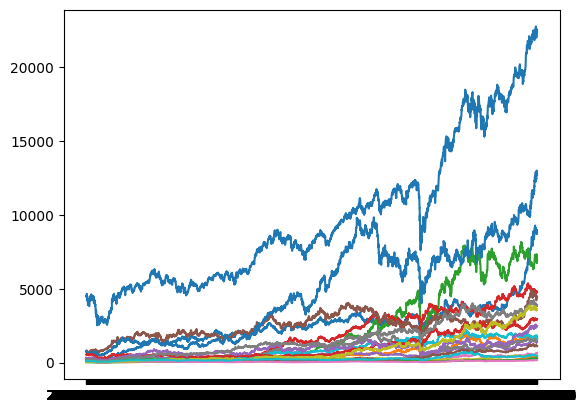

In [ ]:
for stock in Stocks:
  plt.plot(df['date'], df[stock])

In [ ]:

Return= df.copy()
Return[Stocks] = Return[Stocks].pct_change()
Return.dropna(inplace=True)
Return

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA     CIPLA  \
1     2008-06-10    0.002915    0.062550   -0.001044  -0.004163  0.020586   
2     2008-06-11   -0.036156   -0.023607   -0.067921  -0.003506  0.036070   
3     2008-06-12   -0.020811   -0.072839   -0.054933   0.008662 -0.005039   
4     2008-06-13   -0.026104   -0.041426   -0.123962  -0.002013 -0.029006   
5     2008-06-16   -0.022257    0.057163    0.050102  -0.007529  0.031294   
...          ...         ...         ...         ...        ...       ...   
3929  2024-04-23    0.000006    0.005706    0.009539   0.006493 -0.006015   
3930  2024-04-24   -0.011221    0.015457   -0.004673   0.003148  0.038242   
3931  2024-04-25    0.004346   -0.035154   -0.077273  -0.009021  0.005722   
3932  2024-04-26    0.027407   -0.001064    0.014173  -0.000125  0.002098   
3933  2024-04-29   -0.023868    0.012127    0.014202  -0.004979 -0.000816   

      HEROMOTOCO  HINDALCO  INDUSINDBK       ITC  ...      NTPC      ONGC  \
1      -0.008806  0.003417    0.033058 -0.027922  ... -0.010655 -0.057344   
2       0.058597  0.004824    0.005091 -0.010269  ...  0.025626  0.002315   
3       0.005245  0.002824    0.029667  0.002256  ... -0.015353  0.001155   
4      -0.037139 -0.008448    0.054814 -0.009002  ... -0.011621  0.011533   
5      -0.024865 -0.026697   -0.032645  0.016957  ...  0.029766  0.003634   
...          ...       ...         ...       ...  ...       ...       ...   
3929    0.007688 -0.010913   -0.002030  0.009170  ...  0.012394  0.000000   
3930    0.011116  0.039719    0.000102 -0.000699  ...  0.012963  0.009212   
3931    0.023888  0.016821    0.014546  0.020168  ...  0.021470  0.009307   
3932   -0.001489  0.003865   -0.033220  0.005599  ... -0.008909  0.003369   
3933   -0.007547  0.001155    0.028243 -0.004091  ...  0.019663  0.001060   

      RELIANCE  SHRIRAMFIN  TATACONSUM  TATASTEEL       TCS     TITAN  \
1     0.016221   -0.020751   -0.016807  -0.003644 -0.038377 -0.040333   
2     0.028957   -0.017955    0.015022   0.020117  0.012924 -0.018802   
3     0.007040    0.000494    0.004976   0.022828 -0.002336 -0.000188   
4    -0.003039    0.004116   -0.015488  -0.017294  0.024001  0.006389   
5     0.005268   -0.002295    0.006190   0.009512  0.001319 -0.028193   
...        ...         ...         ...        ...       ...       ...   
3929 -0.013870    0.000949   -0.053863  -0.004325  0.002613  0.010079   
3930 -0.006270    0.014051   -0.003513   0.027304 -0.011265 -0.006400   
3931  0.006758    0.012515   -0.003254   0.012987  0.005521 -0.010707   
3932 -0.005086    0.002709   -0.003764  -0.011330 -0.008008  0.003836   
3933  0.008588   -0.002561    0.008967   0.009650  0.012783  0.005593   

         WIPRO     NIFTY  
1    -0.008328 -0.011364  
2     0.000000  0.016585  
3     0.012690  0.003482  
4    -0.009030 -0.004902  
5     0.019898  0.012265  
...        ...       ...  
3929  0.000216  0.008552  
3930 -0.004761  0.001415  
3931  0.002392  0.001538  
3932  0.007809  0.007495  
3933 -0.003551 -0.006664  

[3933 rows x 22 columns]

In [ ]:
ddate = pd.date_range('6/9/2008', '29/4/2024', freq='D')
ddate

DatetimeIndex(['2008-06-09', '2008-06-10', '2008-06-11', '2008-06-12',
               '2008-06-13', '2008-06-14', '2008-06-15', '2008-06-16',
               '2008-06-17', '2008-06-18',
               ...
               '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29'],
              dtype='datetime64[ns]', length=5804, freq='D')

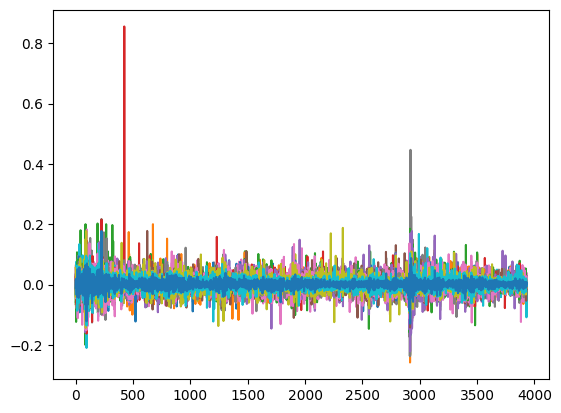

In [ ]:
for stock in Stocks:
  plt.plot(Return[stock])

In [ ]:
#df.set_index(df.date, inplace=True)
#df.drop('date', axis=1, inplace=True)
df.head()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...    NTPC    ONGC  RELIANCE  \
0      772.20    175.60       66.55  69.12  ...  136.08  146.66    540.67   
1      765.40    176.20       68.75  67.19  ...  134.63  138.25    549.44   
2      810.25    177.05       69.10  66.50  ...  138.08  138.57    565.35   
3      814.50    177.55       71.15  66.65  ...  135.96  138.73    569.33   
4      784.25    176.05       75.05  66.05  ...  134.38  140.33    567.60   

   SHRIRAMFIN  TATACONSUM  TATASTEEL     TCS  TITAN   WIPRO    NIFTY  
0      315.65       78.54      82.32  228.52  56.53  108.07  4500.95  
1      309.10       77.22      82.02  219.75  54.25  107.17  4449.80  
2      303.55       78.38      83.67  222.59  53.23  107.17  4523.60  
3      303.70       78.77      85.58  222.07  53.22  108.53  4539.35  
4      304.95       77.55      84.10  227.40  53.56  107.55  4517.10  

[5 rows x 22 columns]

In [ ]:
# we are going in this section to define the output section

df1 = df.copy()
for stock in Stocks:
  df1[stock+ '_output'] = df1[stock].shift(-1)
df1.head()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...  NTPC_output  ONGC_output  \
0      772.20    175.60       66.55  69.12  ...       134.63       138.25   
1      765.40    176.20       68.75  67.19  ...       138.08       138.57   
2      810.25    177.05       69.10  66.50  ...       135.96       138.73   
3      814.50    177.55       71.15  66.65  ...       134.38       140.33   
4      784.25    176.05       75.05  66.05  ...       138.38       140.84   

   RELIANCE_output  SHRIRAMFIN_output  TATACONSUM_output  TATASTEEL_output  \
0           549.44             309.10              77.22             82.02   
1           565.35             303.55              78.38             83.67   
2           569.33             303.70              78.77             85.58   
3           567.60             304.95              77.55             84.10   
4           570.59             304.25              78.03             84.90   

   TCS_output  TITAN_output  WIPRO_output  NIFTY_output  
0      219.75         54.25        107.17       4449.80  
1      222.59         53.23        107.17       4523.60  
2      222.07         53.22        108.53       4539.35  
3      227.40         53.56        107.55       4517.10  
4      227.70         52.05        109.69       4572.50  

[5 rows x 43 columns]

In [ ]:
df_raw = df.copy()
df['NIFTY'] = df['NIFTY'].shift(-1)
df.dropna(inplace=True)
df.tail()

In [ ]:

from sklearn.preprocessing import MinMaxScaler

val_split = 0.2
train_split = 0.9
train_size = int(len(df) * train_split)
val_size = int(train_size * val_split)
test_size = int(len(df) - train_size)
window_size = 20

ts = test_size
split_time = len(df) - ts
test_time = df.iloc[split_time + window_size :, 0:1].values

Xdf, ydf = df.iloc[:, 1:21], df.iloc[:, -1]
X = Xdf.astype("float32")
y = ydf.astype("float32")
y_train_set = y[:split_time]
y_test_set = y[split_time:]
X_train_set = X[:split_time]
X_test_set = X[split_time:]
n_features = X_train_set.shape[1]

# Third, we proceed with scaling inputs to the model. Note how this isspecially important now (compare to past tasks) because we are no longer␣dealing with returns, but with prices!
scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train_set)
X_train_set_scaled = scaler_input.transform(X_train_set)
X_test_set_scaled = scaler_input.transform(X_test_set)
mean_ret = np.mean(y_train_set)
scaler_output = MinMaxScaler(feature_range=(-1, 1))
y_train_set = y_train_set.values.reshape(len(y_train_set), 1)
y_test_set = y_test_set.values.reshape(len(y_test_set), 1)
scaler_output.fit(y_train_set)
y_train_set_scaled = scaler_output.transform(y_train_set)
# Lastly, because we want a time series with up to 20 (window_size) past observations, we need to append these observations into our matrix/vectors!
training_time = df.iloc[:split_time, 0:1].values
X_train = []
y_train = []
for i in range(window_size, y_train_set_scaled.shape[0]):
  X_train.append(X_train_set_scaled[i - window_size : i, :])
  y_train.append(y_train_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
print("Size of X vector in training:", X_train.shape)
print("Size of Y vector in training:", y_train.shape)
X_test = []
y_test = y_test_set
for i in range(window_size, y_test_set.shape[0]):
  X_test.append(X_test_set_scaled[i - window_size : i, :])
X_test, y_test = np.array(X_test), np.array(y_test)
print("Size of X vector in test:", X_test.shape)
print("Size of Y vector in test:", y_test.shape)
print("Number of features in the model: ", n_features)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], n_features)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(50, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(200, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(200, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(200, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(100, return_sequences=False),
  tf.keras.layers.Dense(60),
  tf.keras.layers.Dense(1),
    ])

In [ ]:
model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
hp_lr = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error")
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True)
# fit the models
model.fit(X_train,
  y_train,
  validation_split=0.2,
  epochs=500,
  batch_size=64,
  verbose=1,
  callbacks=[es],
  )

Epoch 1/500
44/44 [==============================] - 27s 363ms/step - loss: 0.1528 - val_loss: 0.6188
Epoch 2/500
44/44 [==============================] - 14s 316ms/step - loss: 0.0510 - val_loss: 0.5690
Epoch 3/500
44/44 [==============================] - 14s 314ms/step - loss: 0.0422 - val_loss: 0.5457
Epoch 4/500
44/44 [==============================] - 14s 318ms/step - loss: 0.0396 - val_loss: 0.5031
Epoch 5/500
44/44 [==============================] - 14s 314ms/step - loss: 0.0377 - val_loss: 0.4555
Epoch 6/500
44/44 [==============================] - 14s 317ms/step - loss: 0.0362 - val_loss: 0.4514
Epoch 7/500
44/44 [==============================] - 14s 316ms/step - loss: 0.0343 - val_loss: 0.4839
Epoch 8/500
44/44 [==============================] - 14s 316ms/step - loss: 0.0343 - val_loss: 0.4534
Epoch 9/500
44/44 [==============================] - 14s 317ms/step - loss: 0.0333 - val_loss: 0.4508
Epoch 10/500
44/44 [==============================] - 14s 311ms/step - loss: 0.033

In [ ]:
prediction = model.predict(X_test)
print(prediction.shape)

predictions = scaler_output.inverse_transform(prediction)
predictions = predictions.flatten()

12/12 [==============================] - 4s 109ms/step
(374, 1)


In [ ]:


values = np.array(y_test[window_size:])
values = values.flatten()
values

array([17730.75, 17656.35, 17736.95, 17786.8 , 18012.2 , 18145.4 ,
       18082.85, 18052.7 , 18117.15, 18202.8 , 18157.  , 18028.2 ,
       18349.7 , 18329.15, 18403.4 , 18409.65, 18343.9 , 18307.65,
       18159.95, 18244.2 , 18267.25, 18484.1 , 18512.75, 18562.75,
       18618.05, 18758.35, 18812.5 , 18696.1 , 18701.05, 18642.75,
       18560.5 , 18609.35, 18496.6 , 18497.15, 18608.  , 18660.3 ,
       18414.9 , 18269.  , 18420.45, 18385.3 , 18199.1 , 18127.35,
       17806.8 , 18014.6 , 18132.3 , 18122.5 , 18191.  , 18105.3 ,
       18197.45, 18232.55, 18042.95, 17992.15, 17859.45, 18101.2 ,
       17914.15, 17895.7 , 17858.2 , 17956.6 , 17894.85, 18053.3 ,
       18165.35, 18107.85, 18027.65, 18118.55, 18118.3 , 17891.95,
       17604.35, 17648.95, 17662.15, 17616.3 , 17610.4 , 17854.05,
       17764.6 , 17721.5 , 17871.7 , 17893.45, 17856.5 , 17770.9 ,
       17929.85, 18015.85, 18035.85, 17944.2 , 17844.6 , 17826.7 ,
       17554.3 , 17511.25, 17465.8 , 17392.7 , 17303.95, 17450

In [ ]:
df_predictions = pd.DataFrame(
{"Date": test_time.flatten(), "Pred RNN": predictions, "values": values}
)
df_predictions.Date = pd.to_datetime(df_predictions.Date, format="%Y-%m-%d")
df_predictions.head()

Date      Pred RNN        values
0 2022-10-21  12564.408203  17730.750000
1 2022-10-24  12550.034180  17656.349609
2 2022-10-25  12533.558594  17736.949219
3 2022-10-27  12517.318359  17786.800781
4 2022-10-28  12502.917969  18012.199219

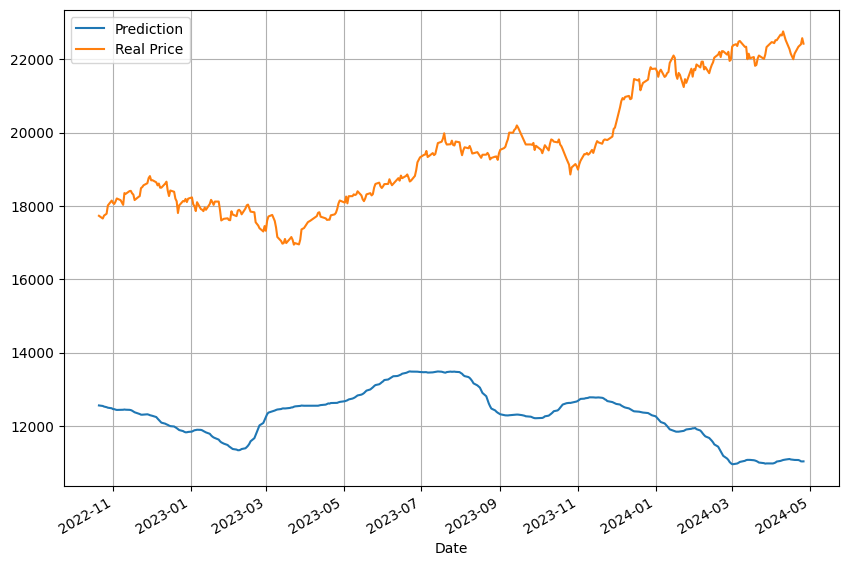

In [ ]:
import matplotlib.pyplot as plt
plt_1 = plt.figure(figsize=(10, 7))
ax = plt.gca()
df_predictions.plot(x="Date", y="Pred RNN", label="Prediction", ax=ax)
df_predictions.plot(x="Date", y="values", label="Real Price", ax=ax)
plt.grid()
plt.show()

In [ ]:
#!pip install mamba-ssm

In [ ]:
import torch
from mamba_ssm import Mamba

#TKAN

In [ ]:
#!pip install tkan==0.3.0 tkat==0.1.1
import time
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Flatten, Input

from tkan import TKAN
from tkat import TKAT

from sklearn.metrics import r2_score

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
num_unknow_features = len(Stocks)
num_know_features = X_train.shape[2] - num_unknow_features

model_tkan = Sequential([
    Input(shape=X_train.shape[1:]),
    TKAN(100, tkan_activations=[{'grid_size': 3} for i in range(5)], sub_kan_output_dim = 20, sub_kan_input_dim = 1, return_sequences=True),
    TKAN(100, tkan_activations=[{'grid_size': 3} for i in range(5)], sub_kan_output_dim = 20, sub_kan_input_dim = 1, return_sequences=False),
    Dense(units=1, activation='linear')
])


model_tkan.compile(optimizer='adam', loss='mean_squared_error')

model_tkan.summary()

history = model_tkan.fit(X_train, y_train, batch_size=50, epochs=50, validation_split=0.2, verbose = False)



/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tkan_8 (TKAN)               (None, 20, 100)           47660     
                                                                 
 tkan_9 (TKAN)               (None, 100)               72060     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 119821 (468.05 KB)
Trainable params: 119721 (467.66 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________
24/24 [==============================] - 9s 61ms/step


ValueError: operands could not be broadcast together with shapes (767,) (15740,) 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tkan_8 (TKAN)               (None, 20, 100)           47660     
                                                                 
 tkan_9 (TKAN)               (None, 100)               72060     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 119821 (468.05 KB)
Trainable params: 119721 (467.66 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________


In [ ]:
X_test.shape

(767, 20, 20)

In [ ]:
preds = model.predict(X_test).flatten()


24/24 [==============================] - 1s 61ms/step


In [ ]:
preds.shape

(767,)

In [ ]:
predictions = scaler_output.inverse_transform(preds)
predictions = predictions.flatten()

ValueError: Expected 2D array, got 1D array instead:
array=[0.4346876  0.43477398 0.43233585 0.42799613 0.42609462 0.42752603
 0.44072127 0.4283653  0.43148285 0.43412283 0.4376377  0.4417317
 0.44895345 0.44985387 0.44811124 0.44775268 0.44906878 0.4489127
 0.44884154 0.45093668 0.44565505 0.44638917 0.44861168 0.45244914
 0.45672888 0.48030117 0.45900872 0.45935184 0.4601485  0.4627094
 0.4664274  0.47142455 0.48067757 0.4830899  0.48351535 0.48472008
 0.48762184 0.4899566  0.501458   0.48585075 0.4871144  0.4886397
 0.48989728 0.4914532  0.49758914 0.5028864  0.5046317  0.5065795
 0.5086666  0.5105033  0.5128795  0.51728874 0.512251   0.51349443
 0.5150552  0.5165625  0.5177177  0.5387192  0.5147981  0.5132421
 0.5122523  0.51211447 0.51202947 0.51227605 0.51737    0.51823723
 0.5184512  0.51804596 0.5178624  0.5175311  0.528636   0.5122873
 0.51326996 0.51343185 0.51384264 0.5141379  0.5193242  0.52313083
 0.5241441  0.5251883  0.52517515 0.52417034 0.52401125 0.5270248
 0.52130777 0.5217803  0.52227265 0.52338254 0.52439684 0.5461803
 0.52462524 0.52565163 0.5267754  0.52757776 0.52790004 0.5273738
 0.53157747 0.5320701  0.5329754  0.5340406  0.5351762  0.53605735
 0.54564476 0.5278978  0.5279886  0.5282611  0.52821213 0.5287972
 0.5357219  0.54077804 0.54230624 0.54388064 0.5457175  0.5474912
 0.54865444 0.55250794 0.5469658  0.54787713 0.5490052  0.55063134
 0.5524373  0.5742766  0.5509486  0.55097705 0.55156094 0.5528467
 0.5533783  0.5538676  0.5580104  0.5588041  0.55901396 0.5590586
 0.55968165 0.5605578  0.570705   0.55433786 0.554726   0.5555818
 0.5568113  0.5583063  0.5653069  0.5697216  0.57069725 0.57069546
 0.5703538  0.5695789  0.5686768  0.5716753  0.56517416 0.56379575
 0.56206983 0.5615904  0.5616281  0.58255243 0.560147   0.5608009
 0.56114703 0.5608632  0.5604026  0.5601924  0.5634666  0.5632997
 0.5631364  0.5620315  0.5599422  0.5585251  0.567801   0.55010265
 0.5471324  0.54420996 0.5414379  0.53973943 0.5443755  0.5460691
 0.54442257 0.5441027  0.5451381  0.5463327  0.5471938  0.5505516
 0.5438851  0.54297096 0.54173255 0.539455   0.5357247  0.55363137
 0.5292951  0.5292808  0.5289495  0.5289828  0.5295901  0.5301407
 0.534926   0.5363256  0.53834665 0.5409053  0.5434227  0.5451831
 0.55737454 0.5423676  0.54353946 0.5448925  0.54626703 0.5470782
 0.5532166  0.5554158  0.55506647 0.55423623 0.552858   0.5501393
 0.54837155 0.5501981  0.5434372  0.5436346  0.54517746 0.5469183
 0.54808754 0.5692537  0.5459488  0.5458822  0.546654   0.54784805
 0.5482841  0.54669213 0.54991984 0.54987484 0.55014694 0.55010915
 0.5494285  0.54846865 0.5577667  0.53742945 0.5361383  0.5365007
 0.5367368  0.53709835 0.5408101  0.5417962  0.54063606 0.54027027
 0.5410536  0.54216236 0.54361004 0.54707205 0.5423034  0.5443197
 0.54586476 0.547426   0.5487067  0.5707227  0.54840153 0.54897916
 0.5492653  0.5491084  0.5488404  0.5495156  0.5543924  0.5557274
 0.556844   0.55727494 0.5578634  0.5581701  0.5679442  0.5506702
 0.5502304  0.5490348  0.548286   0.5480806  0.5521551  0.55300504
 0.5522888  0.55180305 0.5517599  0.5514278  0.5509524  0.55202776
 0.5442849  0.54254395 0.54037756 0.5372133  0.5339171  0.5501811
 0.52308935 0.5202486  0.52069664 0.5215301  0.52061737 0.52115935
 0.5246039  0.5235501  0.52247316 0.5226056  0.5232498  0.5249557
 0.5375636  0.52203405 0.5232367  0.52334714 0.52345484 0.5234915
 0.52833414 0.53110576 0.5299486  0.5269448  0.52370375 0.5202845
 0.5150409  0.511439   0.49941614 0.49609628 0.49219292 0.4902783
 0.4901432  0.5119106  0.49083638 0.49212164 0.49278596 0.4930373
 0.49311393 0.49359113 0.4987505  0.50145316 0.5038223  0.50597906
 0.50706667 0.50793386 0.5196668  0.5039841  0.5066939  0.50943923
 0.5127081  0.5162058  0.5242262  0.5297693  0.5311523  0.5326987
 0.53500396 0.53803    0.5414519  0.54734695 0.543338   0.54491067
 0.5459398  0.5470643  0.5481104  0.5698473  0.5480396  0.54936415
 0.5507435  0.5516337  0.5514427  0.5502399  0.5532609  0.5531074
 0.5528157  0.5529182  0.5527002  0.5537972  0.5646793  0.54790145
 0.5480761  0.54872817 0.54913723 0.54931295 0.55455375 0.5577546
 0.55864805 0.55960155 0.55973643 0.5589475  0.5581821  0.5618816
 0.5557017  0.5553547  0.5542865  0.551746   0.54925007 0.5672962
 0.54252994 0.5418014  0.5410453  0.5417835  0.54294664 0.5440132
 0.54800844 0.547254   0.5470439  0.546487   0.545941   0.54579204
 0.5567953  0.5404437  0.5409527  0.5412077  0.5416206  0.5420573
 0.5479137  0.55170906 0.5529156  0.55423117 0.5552019  0.55605596
 0.55714166 0.561648   0.5562184  0.5562253  0.5565842  0.55712235
 0.55762655 0.5786969  0.55565035 0.55487555 0.5538693  0.5535106
 0.5534471  0.5536471  0.5573974  0.5577208  0.55822337 0.55940664
 0.5604784  0.5610851  0.57232213 0.55610394 0.55595255 0.55580086
 0.5554386  0.5552729  0.56048745 0.5634747  0.56350386 0.56297004
 0.56281227 0.56252414 0.56183106 0.56380594 0.5554307  0.5542309
 0.5542897  0.5545401  0.55478007 0.5762336  0.5543872  0.5550191
 0.5546495  0.5544891  0.55389667 0.55385876 0.557      0.5565817
 0.5561152  0.55597305 0.5557412  0.5557348  0.56658447 0.5501139
 0.5499875  0.5499876  0.54990596 0.54962206 0.55431956 0.55622584
 0.55586976 0.55580896 0.5558676  0.5563149  0.5566968  0.5594459
 0.55340177 0.5535385  0.55329365 0.5530325  0.55313206 0.5744242
 0.55229217 0.5523483  0.55194294 0.5513489  0.550295   0.5493857
 0.55173254 0.5502478  0.54819703 0.5471427  0.546033   0.54571587
 0.556462   0.54027504 0.54051965 0.54036885 0.539286   0.53772646
 0.54155326 0.54291195 0.5418362  0.5403219  0.5395044  0.5389616
 0.5385466  0.5402665  0.53300357 0.53207505 0.5322664  0.53330094
 0.53490067 0.5575374  0.5363686  0.5379862  0.5399212  0.54167736
 0.5430776  0.54419684 0.54851073 0.549206   0.5497368  0.5502386
 0.5511098  0.5522032  0.5635013  0.54788476 0.5489534  0.55028355
 0.551305   0.55225694 0.5579749  0.5617179  0.56276506 0.56378573
 0.5645754  0.5648548  0.5652728  0.56862724 0.5626666  0.5624273
 0.5620824  0.5620569  0.56234723 0.58390486 0.56189907 0.5627346
 0.5638085  0.5647061  0.56499094 0.5652614  0.5690699  0.5697565
 0.57048804 0.5713556  0.57206404 0.5723297  0.58295995 0.5669267
 0.5674863  0.56784904 0.5681999  0.56849575 0.57429224 0.57767737
 0.5780183  0.57791    0.5780696  0.57830215 0.5788146  0.5829226
 0.5779484  0.57906514 0.5804753  0.58159965 0.5819632  0.6033354
 0.58109546 0.58147115 0.58170897 0.5821692  0.58251166 0.58281255
 0.5860299  0.5864841  0.5868458  0.5868609  0.5870819  0.5873641
 0.5976441  0.58145183 0.58218867 0.58260834 0.58227247 0.581629
 0.5865523  0.58908826 0.58916545 0.5894255  0.5895187  0.5892108
 0.5887964  0.5915932  0.585372   0.5849676  0.58492273 0.58507836
 0.5853516  0.6067778  0.5839373  0.5838583  0.5840616  0.58433545
 0.58470535 0.5855429  0.5892857  0.5900699  0.59049153 0.5908925
 0.59146035 0.59217525 0.60237914 0.5860859  0.5864538  0.58691925
 0.5873195  0.58740926 0.59242827 0.59493595 0.5947142  0.5945571
 0.59405535 0.59416866 0.5939977  0.59648603 0.5901008  0.59008044
 0.5898778  0.59004825 0.59050375 0.6122187  0.58997744 0.59031844
 0.59069365 0.5908641  0.59109205 0.5909927  0.59312373 0.5922779
 0.5912961  0.591078   0.5909093  0.590748   0.60052353 0.58408886
 0.5844692  0.58500904 0.58546346 0.58584434 0.5913525  0.594296
 0.59455824 0.5947533  0.5953966  0.59612674 0.596609   0.6000639
 0.59441614 0.5947132  0.5949272  0.59504294 0.59534883 0.61719984
 0.5952671  0.59582424 0.5966418  0.5973502  0.5978247  0.5981028
 0.6007932  0.6009341  0.60090435 0.6011103  0.6016253  0.6022279
 0.61243916 0.5961113  0.5958825  0.59575754 0.59605575 0.59655964
 0.6023889  0.6059424  0.6063531  0.6066298  0.6067441  0.6068305
 0.6069842  0.6101244  0.60410655 0.604147   0.60419613 0.6045257
 0.6049466  0.6269058  0.6048883  0.6048403  0.6046465  0.6047174
 0.60467684 0.6044173  0.6069914  0.6070852  0.6074171  0.60758483
 0.6078543  0.6080044  0.61794126 0.6014545  0.60168535 0.6018561
 0.60179806 0.60171986 0.60661054 0.60972863 0.60985404 0.6100637
 0.61041945 0.6107324  0.61079925 0.61344296 0.6075331  0.6076356
 0.6076208  0.60752887 0.60716885 0.62854075 0.6064766  0.6068337
 0.6070493  0.6071431  0.6072229  0.6074833  0.6099849  0.60991514
 0.6094327  0.6091809  0.6089513  0.6089332  0.60903925 0.60170156
 0.6018523  0.6022336  0.6025604  0.6028674  0.5839761  0.6121878
 0.6124883  0.6127036  0.6128201  0.612878   0.59736586 0.60991555
 0.60993755 0.6097287  0.6093885  0.6090174  0.6069918  0.6076097
 0.60761636 0.60771716 0.60795325 0.6081736  0.60827816].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
errors = preds - y_test.flatten()
rmse = np.sqrt(np.mean(np.square(errors)))
r2 = r2_score(y_true=y_test.flatten(), y_pred=preds)
mae = np.mean(np.abs(errors))

metrics_summary = f"""
Model Type: TKAN
------------------------------------
Root Mean Squared Error (RMSE): {rmse:.4f}
R-squared (R²) Score: {r2:.4f}
Mean Absolute Error (MAE): {mae:.4f}
"""
print(metrics_summary)

all_errors = {}
preds = model.predict(X_test)
errors = preds-y_test
all_errors['TKAN'] = errors

**References**

- Filipovi ́c, Damir, and Amir Khalilzadeh. “Machine learning for predicting
stock return volatility”.Swiss Finance Institute Research Paper, nos. 21–95, 2021.
- Genet, Remi, and Hugo Inzirillo. “A Temporal Kolmogorov-Arnold Transformer for Time Series Forecasting”. arXiv preprint arXiv:2406.02486, 2024.
- Gu, Albert, and Tri Dao. “Mamba: Linear-time sequence modeling with selective state spaces”. arXivpreprint arXiv:2312.00752, 2023.
- Gu, Albert, et al. “Efficiently modeling long sequences with structured state spaces”. arXiv preprintarXiv:2111.00396, 2021.
- Irfan, Mohammad, et al. Advanced Machine Learning Algorithms for Complex Financial Applications.IGI Global, 2023.
- Lim, Bryan, and Stefan Zohren. “Time-series forecasting with deep learning: a survey”. Philosophical Transactions of the Royal Society A, vol. 379, no. 2194, 2021, p. 20200209.
- Liu, Ziming, et al. “Kan: Kolmogorov-arnold networks”. arXiv preprint arXiv:2404.19756, 2024.
- Md Atik Ahameda, Qiang Chenga. “A Time Series is Worth 4 Mambas for Long-term Forecasting”.arXiv preprint arXiv:2403.09898, 2024.
- Selvin, Sreelekshmy, et al. “Stock price prediction using LSTM, RNN and CNN-sliding window model”.2017 international conference on advances in computing, communications and informatics (icacci).IEEE, 2017, pp. 1643–47.
- Shi, Zhuangwei. “Selective state space model for stock prediction”. arXiv preprint arXiv:2402.18959,2024.
- Yuan, Mingsheng, et al. “Is Mamba Effective for Time Series Forecasting?” arXiv preprint arXiv:2403.11144,2024.

